<a href="https://colab.research.google.com/github/Betson1/MachineLearning/blob/main/%D0%A2%D1%80%D0%B5%D1%82%D1%8C%D1%8F_%D0%BB%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%D0%A0%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F%20%D0%B8%D1%81%D0%BF%D1%80%D0%B0%D0%B2%D0%BB%D0%B5%D0%BD%D0%BD%D0%B0%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Загрузка данных

In [18]:
# импорт нужных библиотек
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes  # подключаем датасет из sklearn
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [19]:
from google.colab import drive

drive.mount('/content/drive/')

df = pd.read_csv('/content/drive/MyDrive/auction_verification.csv')

display(df)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


,process.b1.capacity,process.b2.capacity,process.b3.capacity,process.b4.capacity,property.price,property.product,property.winner,verification.result,verification.time
0,0,0,2,1,59,1,0,False,163.316667
1,0,0,2,1,59,2,0,False,200.860000
2,0,0,2,1,59,4,0,False,154.888889
3,0,0,2,1,59,6,0,False,108.640000
4,0,0,2,1,60,1,0,True,85.466667
...,...,...,...,...,...,...,...,...,...
2038,2,3,2,1,90,5,0,True,82.425000
2039,2,3,2,1,90,5,1,True,1316.983333
2040,2,3,2,1,90,5,2,False,9365.450000
2041,2,3,2,1,90,5,3,False,8474.025000


In [20]:
df.describe()

,process.b1.capacity,process.b2.capacity,process.b3.capacity,process.b4.capacity,property.price,property.product,property.winner,verification.time
count,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000
mean,1.000000,2.093979,1.883994,0.587861,71.473324,3.252080,0.455213,7336.944574
std,0.816696,0.811269,0.320310,0.492340,8.048740,1.804225,1.062828,10375.393650
min,0.000000,0.000000,1.000000,0.000000,59.000000,1.000000,0.000000,77.916667
25%,0.000000,1.000000,2.000000,0.000000,65.000000,2.000000,0.000000,546.818910
50%,1.000000,2.000000,2.000000,1.000000,70.000000,3.000000,0.000000,1316.983333
75%,2.000000,3.000000,2.000000,1.000000,78.000000,5.000000,0.000000,10876.638889
max,2.000000,3.000000,2.000000,1.000000,90.000000,6.000000,4.000000,44130.520833


# Линейная регрессия



In [21]:
# Функция вычисления метрик
def Reg_Models_Evaluation_Metrics(model, X_train, y_train, X_test, y_test, y_pred):
    cv_score = cross_val_score(estimator=model, X=X_train, y=y_train, cv=10)
    r2 = model.score(X_test, y_test)
    n = X_test.shape[0]
    p = X_test.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    CV_R2 = cv_score.mean()

    print(f'RMSE: {round(RMSE, 4)}\nR2: {round(r2, 4)}\nAdjusted R2: {round(adjusted_r2, 4)}\nCross Validated R2: {round(CV_R2, 4)}')
    return r2, adjusted_r2, CV_R2, RMSE

Фичи в датасете:
 Index(['process.b1.capacity', 'process.b2.capacity', 'process.b3.capacity',
       'process.b4.capacity', 'property.price', 'property.product',
       'property.winner', 'verification.result'],
      dtype='object')


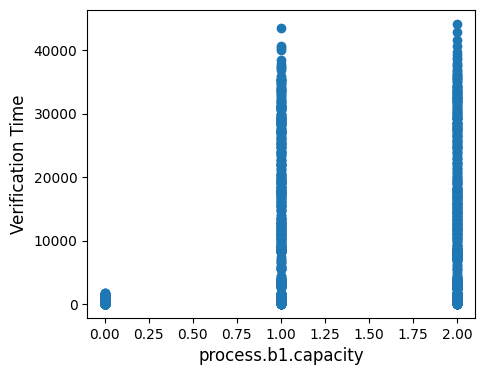

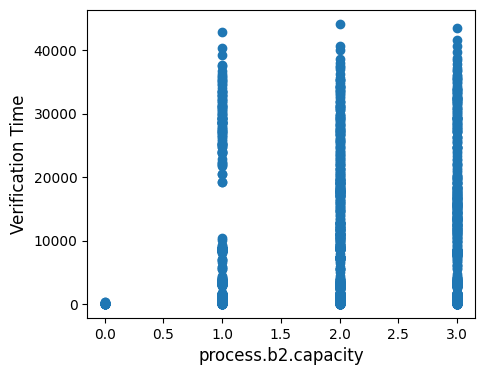

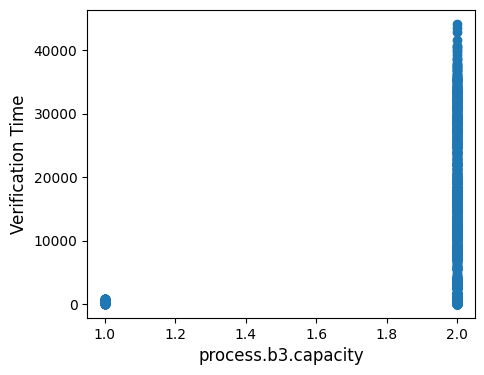

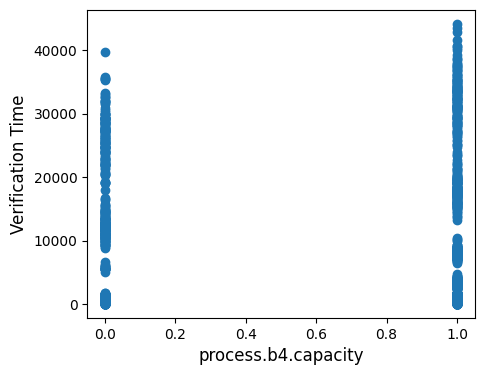

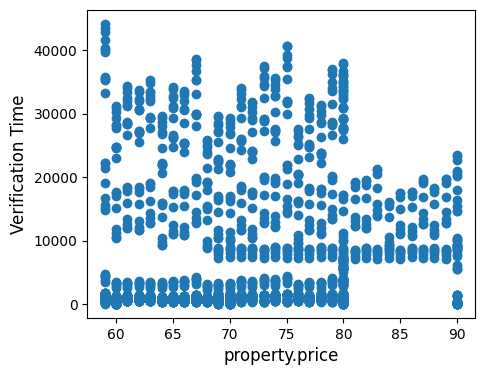

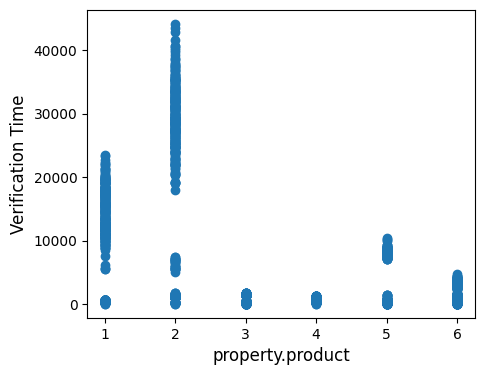

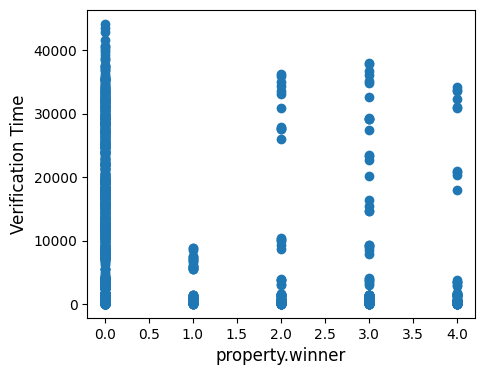

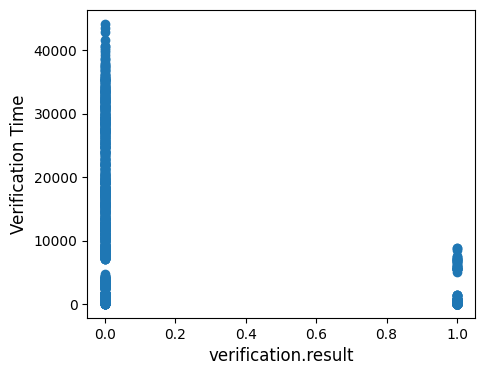

In [22]:
# Выведем названия фич
features = df.drop(['verification.time'], axis=1).columns
print("Фичи в датасете:\n", features)

# Нарисуем диаграммы рассеяния, чтобы лучше понять, как признаки связаны с целевой переменной
for feature_name in features:
    plt.figure(figsize=(5, 4))
    plt.scatter(auction[feature_name], auction['verification.time'])
    plt.ylabel('Verification Time', size=12)
    plt.xlabel(feature_name, size=12)
    plt.show()


In [23]:
X = df.drop('verification.time', axis=1)  # Признаки
y = df['verification.time']  # Целевая переменная

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% для обучения, 20% для теста

In [24]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [25]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R-squared: {r2}")
print(f"MSE: {mse}")
print(f"MAE: {mae}")

R-squared: 0.3833591505604984
MSE: 64307134.71538741
MAE: 6160.9959240945755


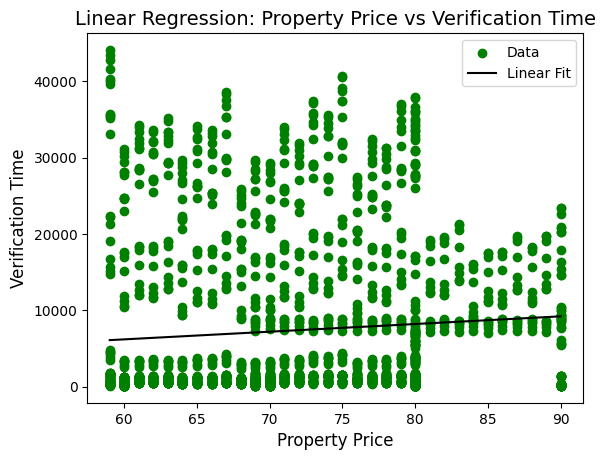

In [26]:
# Попробуем отрисовать, как выглядит наша линейная регрессия

# Используем, например, колонку 'property.price' как признак
X2 = df['property.price'].values[:, np.newaxis]
# Целевая переменная - 'verification.time'
y2 = df['verification.time'].values

# Обучаем линейную регрессию
model2 = LinearRegression()
model2.fit(X2, y2)

# Построим график
plt.scatter(X2, y2, color='g', label='Data')
plt.plot(X2, model2.predict(X2), color='k', label='Linear Fit')
plt.ylabel('Verification Time', size=12)
plt.xlabel('Property Price', size=12)
plt.title('Linear Regression: Property Price vs Verification Time', size=14)
plt.legend()
plt.show()


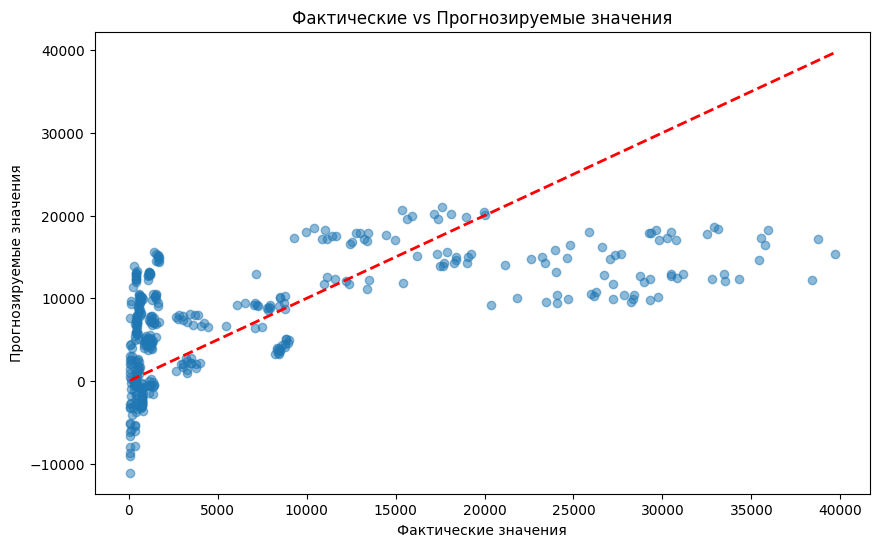

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)  # Фактические vs прогнозируемые значения
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Линия идеального прогноза
plt.xlabel('Фактические значения')
plt.ylabel('Прогнозируемые значения')
plt.title('Фактические vs Прогнозируемые значения')
plt.show()

# Полиномиальная регрессия

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import numpy as np

# Функция вычисления метрик
def Reg_Models_Evaluation_Metrics(model, X_train, y_train, X_test, y_test, y_pred):
    cv_score = cross_val_score(estimator=model, X=X_train, y=y_train, cv=10)
    r2 = model.score(X_test, y_test)
    n = X_test.shape[0]
    p = X_test.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    CV_R2 = cv_score.mean()

    print(f'RMSE: {round(RMSE, 4)}\nR2: {round(r2, 4)}\nAdjusted R2: {round(adjusted_r2, 4)}\nCross Validated R2: {round(CV_R2, 4)}')
    return r2, adjusted_r2, CV_R2, RMSE


RMSE: 2980.6432
R2: 0.9113
Adjusted R2: 0.5401
Cross Validated R2: 0.7064


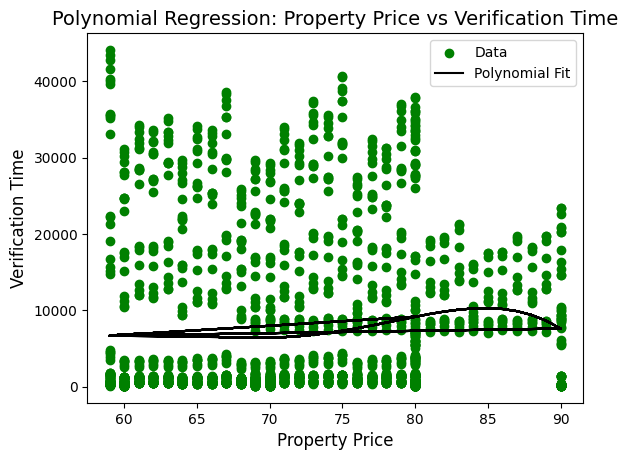

In [29]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Генерация полиномиальных признаков
poly = PolynomialFeatures(degree=4, include_bias=False)

# Используем все признаки для полиномиальной регрессии
poly_features = poly.fit_transform(X)
X_p_train, X_p_test, y_p_train, y_p_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)

# Создаем и обучаем модель линейной регрессии
modelPR = LinearRegression()
modelPR.fit(X_p_train, y_p_train)

# Предсказания
y_pr_PR = modelPR.predict(X_p_test)

# Вычисление метрик
_ = Reg_Models_Evaluation_Metrics(modelPR, X_p_train, y_p_train, X_p_test, y_p_test, y_pr_PR)

# Попробуем визуализировать полиномиальную регрессию на одном из признаков, например, 'property.price'
X2 = df['property.price'].values[:, np.newaxis]
y2 = df['verification.time'].values

# Генерация полиномиальных признаков для одного столбца
poly_features = poly.fit_transform(X2)

# Обучение модели
model2 = LinearRegression()
model2.fit(poly_features, y2)

# Построение графика
plt.scatter(X2, y2, color='g', label='Data')
plt.plot(X2, model2.predict(poly.fit_transform(X2)), color='k', label='Polynomial Fit')
plt.ylabel('Verification Time', size=12)
plt.xlabel('Property Price', size=12)
plt.title('Polynomial Regression: Property Price vs Verification Time', size=14)
plt.legend()
plt.show()


# Далее обучение моделей собранно в одину группу





Регрессия дерева принятия решений

In [30]:
from sklearn.tree import DecisionTreeRegressor

# Создаем модель дерева решений для регрессии
modelDT = DecisionTreeRegressor(random_state=42)  # Добавлен random_state для воспроизводимости результатов

# Обучаем модель на тренировочных данных
modelDT.fit(X_train, y_train)

# Предсказываем значения на тестовых данных
y_dt_pred = modelDT.predict(X_test)

# Вычисляем и выводим метрики модели
R2, adjusted_r2, CV_R2, RMSE = Reg_Models_Evaluation_Metrics(modelDT, X_train, y_train, X_test, y_test, y_dt_pred)


RMSE: 1022.0354
R2: 0.99
Adjusted R2: 0.9898
Cross Validated R2: 0.992


Регрессия случайного леса

In [31]:
from sklearn.ensemble import RandomForestRegressor

# Создаем модель случайного леса для регрессии
modelRF = RandomForestRegressor(n_estimators=100, random_state=42)  # Добавлен random_state для воспроизводимости

# Обучаем модель на тренировочных данных
modelRF.fit(X_train, y_train)

# Предсказываем значения на тестовых данных
y_rf_pred = modelRF.predict(X_test)

# Вычисляем и выводим метрики модели
R2, adjusted_r2, CV_R2, RMSE = Reg_Models_Evaluation_Metrics(modelRF, X_train, y_train, X_test, y_test, y_rf_pred)




RMSE: 798.9836
R2: 0.9939
Adjusted R2: 0.9938
Cross Validated R2: 0.9942


Регрессия опорных векторов (SVR)

RMSE: 11023.6743
R2: -0.1653
Adjusted R2: -0.1886
Cross Validated R2: -0.1772


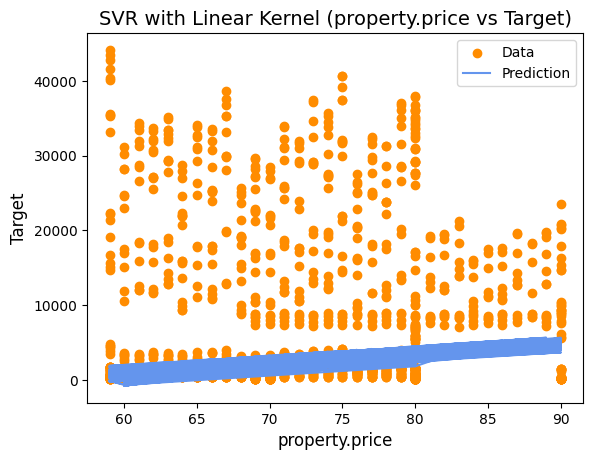

In [32]:
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# Создаем модель метода опорных векторов с линейным ядром
modelSVR = SVR(kernel='linear', C=1.0)  # Параметр C добавлен для контроля регуляризации

# Обучаем модель на тренировочных данных
modelSVR.fit(X_train, y_train)

# Предсказываем значения на тестовых данных
y_svr_pred = modelSVR.predict(X_test)

# Вычисляем и выводим метрики модели
R2, adjusted_r2, CV_R2, RMSE = Reg_Models_Evaluation_Metrics(modelSVR, X_train, y_train, X_test, y_test, y_svr_pred)


# Визуализация результатов
feature_name = "property.price"
if feature_name in X_train.columns:
    plt.scatter(X_train[feature_name], y_train, color='darkorange', label='Data')
    plt.plot(X_train[feature_name], modelSVR.predict(X_train), color='cornflowerblue', label='Prediction')
    plt.xlabel(feature_name, size=12)
    plt.ylabel('Target', size=12)
    plt.title(f'SVR with Linear Kernel ({feature_name} vs Target)', size=14)
    plt.legend()
    plt.show()
else:
    print(f"Feature '{feature_name}' not found in the training data. Skipping visualization.")


RMSE: 11794.5752
R2: -0.3339
Adjusted R2: -0.3606
Cross Validated R2: -0.3404


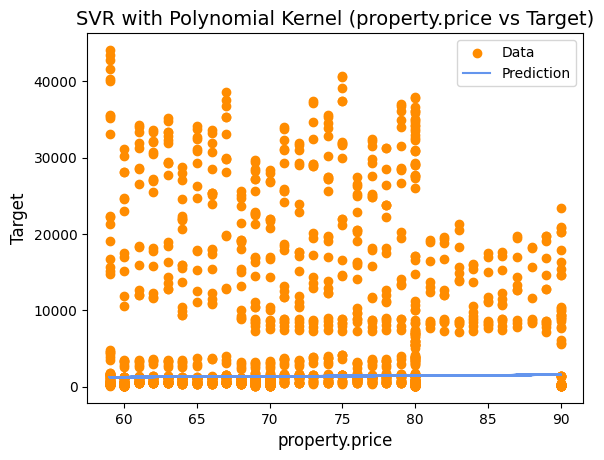

In [33]:
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# Создаем модель метода опорных векторов с полиномиальным ядром
modelSVR = SVR(kernel='poly', degree=3, C=1.0, epsilon=0.1)  # Добавлены параметры degree, C и epsilon

# Обучаем модель на тренировочных данных
modelSVR.fit(X_train, y_train)

# Предсказываем значения на тестовых данных
y_svr_pred = modelSVR.predict(X_test)

# Вычисляем и выводим метрики модели
R2, adjusted_r2, CV_R2, RMSE = Reg_Models_Evaluation_Metrics(modelSVR, X_train, y_train, X_test, y_test, y_svr_pred)


# Визуализация результатов
feature_name = "property.price"
if feature_name in X_train.columns:
    plt.scatter(X_train[feature_name], y_train, color='darkorange', label='Data')
    plt.plot(X_train[feature_name], modelSVR.predict(X_train), color='cornflowerblue', label='Prediction')
    plt.xlabel(feature_name, size=12)
    plt.ylabel('Target', size=12)
    plt.title(f'SVR with Polynomial Kernel ({feature_name} vs Target)', size=14)
    plt.legend()
    plt.show()
else:
    print(f"Feature '{feature_name}' not found in the training data. Skipping visualization.")


RMSE: 11800.8872
R2: -0.3354
Adjusted R2: -0.3621
Cross Validated R2: -0.3426


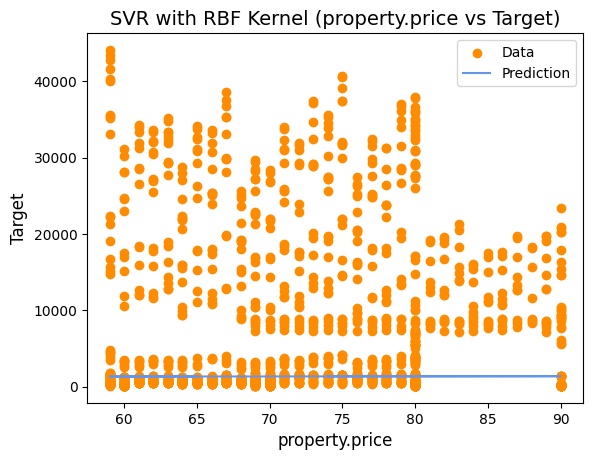

In [34]:
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# Создаем модель метода опорных векторов с RBF ядром
modelSVR = SVR(kernel='rbf', C=1.0, epsilon=0.1, gamma='scale')  # Добавлены параметры C, epsilon и gamma

# Обучаем модель на тренировочных данных
modelSVR.fit(X_train, y_train)

# Предсказываем значения на тестовых данных
y_svr_pred = modelSVR.predict(X_test)

# Вычисляем и выводим метрики модели
R2, adjusted_r2, CV_R2, RMSE = Reg_Models_Evaluation_Metrics(modelSVR, X_train, y_train, X_test, y_test, y_svr_pred)

# Визуализация результатов
feature_name = "property.price"
if feature_name in X_train.columns:
    plt.scatter(X_train[feature_name], y_train, color='darkorange', label='Data')
    plt.plot(X_train[feature_name], modelSVR.predict(X_train), color='cornflowerblue', label='Prediction')
    plt.xlabel(feature_name, size=12)
    plt.ylabel('Target', size=12)
    plt.title(f'SVR with RBF Kernel ({feature_name} vs Target)', size=14)
    plt.legend()
    plt.show()
else:
    print(f"Feature '{feature_name}' not found in the training data. Skipping visualization.")


Регрессия ElasticNet

RMSE: 8008.8326
R2: 0.3849
Adjusted R2: 0.3726
Cross Validated R2: 0.3887


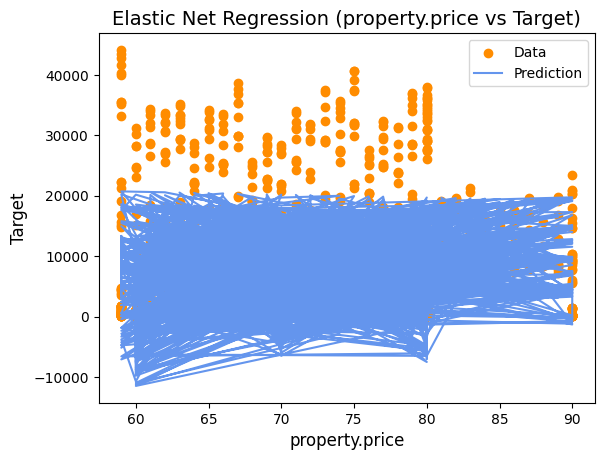

In [35]:
from sklearn.linear_model import ElasticNet
import matplotlib.pyplot as plt

# Создаем модель Elastic Net регрессии
modelEN = ElasticNet(alpha=0.1, l1_ratio=0.8, random_state=42)  # Добавлен random_state для воспроизводимости

# Обучаем модель на тренировочных данных
modelEN.fit(X_train, y_train)

# Предсказываем значения на тестовых данных
y_en_pred = modelEN.predict(X_test)

# Вычисляем и выводим метрики модели
R2, adjusted_r2, CV_R2, RMSE = Reg_Models_Evaluation_Metrics(modelEN, X_train, y_train, X_test, y_test, y_en_pred)

# Визуализация результатов
feature_name = "property.price"
if feature_name in X_train.columns:
    plt.scatter(X_train[feature_name], y_train, color='darkorange', label='Data')
    plt.plot(X_train[feature_name], modelEN.predict(X_train), color='cornflowerblue', label='Prediction')
    plt.xlabel(feature_name, size=12)
    plt.ylabel('Target', size=12)
    plt.title(f'Elastic Net Regression ({feature_name} vs Target)', size=14)
    plt.legend()
    plt.show()
else:
    print(f"Feature '{feature_name}' not found in the training data. Skipping visualization.")
